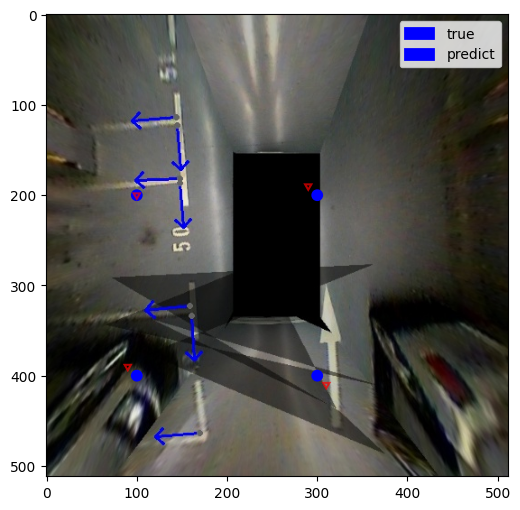

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 读取停车场图片
image = plt.imread('../tmp/0.jpg')

# 假设两组关键点的坐标
true_keypoints = [
    (100, 200),  # 左上角
    (300, 200),  # 右上角
    (300, 400),  # 右下角
    (100, 400)   # 左下角
]

predicted_keypoints = [
    (100, 200),  # 左上角
    (290, 190),  # 右上角
    (310, 410),  # 右下角
    (90, 390)    # 左下角
]

# 创建一个图
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image)

# 绘制真实值关键点
for i, point in enumerate(true_keypoints):
    # 使用实心圆点表示真实值
    circle = patches.Circle(point, radius=5, edgecolor='blue', facecolor='blue', alpha=1, linewidth=2, label='true')
    ax.add_patch(circle)
    # 添加注释
    # ax.text(point[0] + 10, point[1] - 10, f'True {i+1}', color='white', fontsize=10, weight='bold')

# 绘制预测值关键点
for i, point in enumerate(predicted_keypoints):
    # 使用空心三角形表示预测值
    triangle = patches.RegularPolygon(point, numVertices=3, radius=4, edgecolor='red', facecolor='none', alpha=0.7, linewidth=1.5, label='predict')
    ax.add_patch(triangle)
    # 添加注释
    # ax.text(point[0] + 10, point[1] - 10, f'Pred {i+1}', color='white', fontsize=10, weight='bold')

# 添加图例
ax.legend(['true', 'predict'], loc='upper right', handlelength=2, handletextpad=1)

# 显示图像
plt.show()

In [1]:
import cv2
import numpy as np

def draw_side_by_side_keypoints(image, true_keypoints=None, predicted_keypoints=None):
    """
    将真值和预测值分别绘制在图像的左右两边，并将两幅图像横向拼接在一起。

    参数:
        image (numpy.ndarray): 输入图像矩阵（BGR格式）。
        true_keypoints (list): 真实值关键点的坐标列表，格式为 (x, y, angle)。
        predicted_keypoints (list): 预测值关键点的坐标列表，格式为 (x, y, angle)。

    返回:
        numpy.ndarray: 绘制后的图像（BGR格式）。
    """
    # 创建左半边图像（真实值）
    left_image = image.copy()
    if true_keypoints is not None:
        for i, (x, y, angle) in enumerate(true_keypoints):
            # 绘制实心圆点
            cv2.circle(left_image, (x, y), 5, (255, 0, 0), -1)
            # 绘制方向箭头
            arrow_length = 20
            dx = arrow_length * np.cos(np.deg2rad(angle))
            dy = arrow_length * np.sin(np.deg2rad(angle))
            cv2.arrowedLine(left_image, (x, y), (x + int(dx), y + int(dy)), (255, 0, 0), 2)

    # 创建右半边图像（预测值）
    right_image = image.copy()
    if predicted_keypoints is not None:
        for i, (x, y, angle) in enumerate(predicted_keypoints):
            # 绘制空心三角形
            triangle_points = np.array([
                (x - 5, y - 5),
                (x + 5, y - 5),
                (x, y + 5)
            ], dtype=np.int32)
            cv2.polylines(right_image, [triangle_points], isClosed=True, color=(0, 0, 255), thickness=2)
            # 绘制方向箭头
            arrow_length = 20
            dx = arrow_length * np.cos(np.deg2rad(angle))
            dy = arrow_length * np.sin(np.deg2rad(angle))
            cv2.arrowedLine(right_image, (x, y), (x + int(dx), y + int(dy)), (0, 0, 255), 2)

    # 横向拼接两幅图像
    combined_image = cv2.hconcat([left_image, right_image])

    return combined_image

# 示例用法
image = cv2.imread('../tmp/0.jpg')

true_keypoints = [
    (100, 200, 90),  # 左上角，角度90度
    (300, 200, 180), # 右上角，角度180度
    (300, 400, 270), # 右下角，角度270度
    (100, 400, 0)    # 左下角，角度0度
]

predicted_keypoints = [
    (100, 200, 90),  # 左上角，角度90度
    (290, 190, 180), # 右上角，角度180度
    (310, 410, 270), # 右下角，角度270度
    (90, 390, 0)     # 左下角，角度0度
]

# 调用函数绘制关键点
combined_image = draw_side_by_side_keypoints(image, true_keypoints, predicted_keypoints)

# 将绘制后的图像保存到文件
cv2.imwrite('parking_lot_with_keypoints.jpg', combined_image)

# 显示图像
# cv2.imshow('Parking Lot with Keypoints', combined_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [16]:
import cv2
import numpy as np

def draw_legend(image, legend_items, position_ratio=(0, 0), font_scale=0.4, thickness=1, background_color=(255, 255, 255), text_color=(0, 0, 0)):
    """
    在图像的右上角绘制图例。

    参数:
        image (np.ndarray): 输入图像矩阵（BGR格式）。
        legend_items (list): 图例项列表，每个项是一个元组，格式为 (label, color)。
        position_ratio (tuple): 图例的起始位置占图像宽度和高度的比例 (x_ratio, y_ratio)。
        font_scale (float): 字体大小。
        thickness (int): 字体粗细。
        background_color (tuple): 背景框的颜色。
        text_color (tuple): 文本的颜色。

    返回:
        image: 绘制后的图像矩阵。
    """
    # 获取图像的尺寸
    img_height, img_width, _ = image.shape

    # 动态计算图例的尺寸
    legend_width = int(img_width * 0.1)  # 图例宽度为图像宽度的15%
    legend_height_per_item = int(img_height * 0.03)  # 每个图例项的高度为图像高度的3%
    legend_height = len(legend_items) * legend_height_per_item + 5  # 图例总高度

    # 计算图例的起始位置
    x_start = int(img_width * position_ratio[0])
    y_start = int(img_height * position_ratio[1])

    # 创建一个白色背景的图例框
    legend_bg = np.full((legend_height, legend_width, 3), background_color, dtype=np.uint8)

    # 在图例框上绘制每个图例项
    for i, (label, color) in enumerate(legend_items):
        # 计算当前图例项的位置
        y_start_item = i * legend_height_per_item
        y_end_item = y_start_item + legend_height_per_item

        # 绘制颜色块
        cv2.rectangle(legend_bg, (5, y_start_item + 5), (20, y_start_item + 15), color, -1)
        # 绘制标签文本
        cv2.putText(legend_bg, label, (25, y_start_item + 15), cv2.FONT_HERSHEY_SIMPLEX, font_scale, text_color, thickness)

    # 将图例框绘制到图像的右上角
    image[y_start:y_start + legend_height, x_start:x_start + legend_width] = legend_bg

    return image

# 示例用法
image = cv2.imread('../tmp/0.jpg')

# 定义图例项
legend_items = [
    ("L", (255, 0, 0)),  # 蓝色方块
    ("T", (0, 255, 0)),
    ("X", (0, 0, 255))
]

# 调用函数绘制图例
image = draw_legend(image, legend_items)

# 保存图像
cv2.imwrite('image_with_legend.jpg', image)

True

In [5]:
import cv2
import numpy as np

# 创建一个空白图像
height, width = 512, 512
image = np.zeros((height, width, 3), dtype=np.uint8)

# 绘制一个红色圆形
center = (200, 200)  # 圆心坐标
radius = 50          # 半径
color = (0, 0, 255)  # 红色 (B, G, R)
thickness = 2        # 边框粗细

# cv2.circle(image, center, radius, color, thickness)
cv2.circle(
    image, (316, 123), 3, (0, 0, 255), 2
)
# 显示图像
# cv2.imshow('Circle', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [6]:
cv2.imwrite("image.jpg", image)

True